# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Predict](img/forsale.jpg)

## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Integrantes:

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------ | :---: |
| Felipe Sant Ana Parreira | RM 331128     | `2IA` |
| Phillipe Souza Pires     | RM 331127     | `2IA` |
| Thiago Domingos          | RM 331190     | `2IA` |

1. __Iniciação__
2. __Análise Exploratória dos Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

Duas novas colunas criadas para manipulação dos dados.
23. kw: potência
24. nm: torque

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

%matplotlib inline

Leitura do arquivo csv

In [2]:
df_automobile = pd.read_csv("data/automobile-mod.csv", sep=";")

Amostra do conteúdo

In [3]:
df_automobile.head(1)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495


In [4]:
df_automobile.columns

Index(['make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'number_of_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

## Análise Exploratória dos Dados

Análise da variável que será predita.
O mínimo é de 5118, não temos então problemas com valores zerados nesta variável.

In [111]:
df_automobile["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

### Histograma e Kernel Density Estimate (KDE)

**Referência**: https://seaborn.pydata.org/tutorial/distributions.html

Para lidarmos com a predição do preço (*price*) de um veículo, vamos analisar a distribuição da *feature* alvo na nossa base de dados, com o histograma e utilizamos o distplot, pois combina uma linha que demonstra uma suavização da densidade desta distribuição, o KDE.

C:\Users\automatep\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


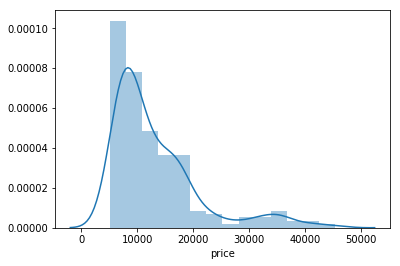

In [112]:
sns.distplot(df_automobile['price'])

Parece um desvio de uma Distribuição Normal

Correlação com mapa de calor

### skewness and kurtosis
**Referência(s)**:
1. __https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats__
2. __https://en.wikipedia.org/wiki/Skewness__
3. __https://en.wikipedia.org/wiki/Kurtosis__

In [113]:
print("Skewness: %f" % df_automobile['price'].skew())
print("Kurtosis: %f" % df_automobile['price'].kurt())

Skewness: 1.809675
Kurtosis: 3.231537


Estes números ajudam a analisar a dispersão do *price*, como o skewness apresentou um valor positivo, podemos verificar que é uma distribuição assimétrica com bastantes valores a maiores/direita do que/da média.
Continuando tentando definir a forma da da distribuição analisamos o kurtosis que ficou positivo, então podemos dizer que temos *heavy-tailes* ou caldas pesadas à direita e até pensarmos na possibilidade da existência de *outliers*.

Analisando a correlação com o auxílio de um mapa de calor.

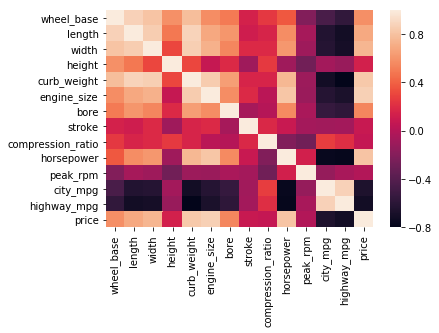

In [114]:
sns.heatmap(df_automobile.corr())

Vimos que o comprimento, largura, tamanho do motor, quantidade de cavalo e peso do veículo correlacionam diretamente com o valor do mesmo.

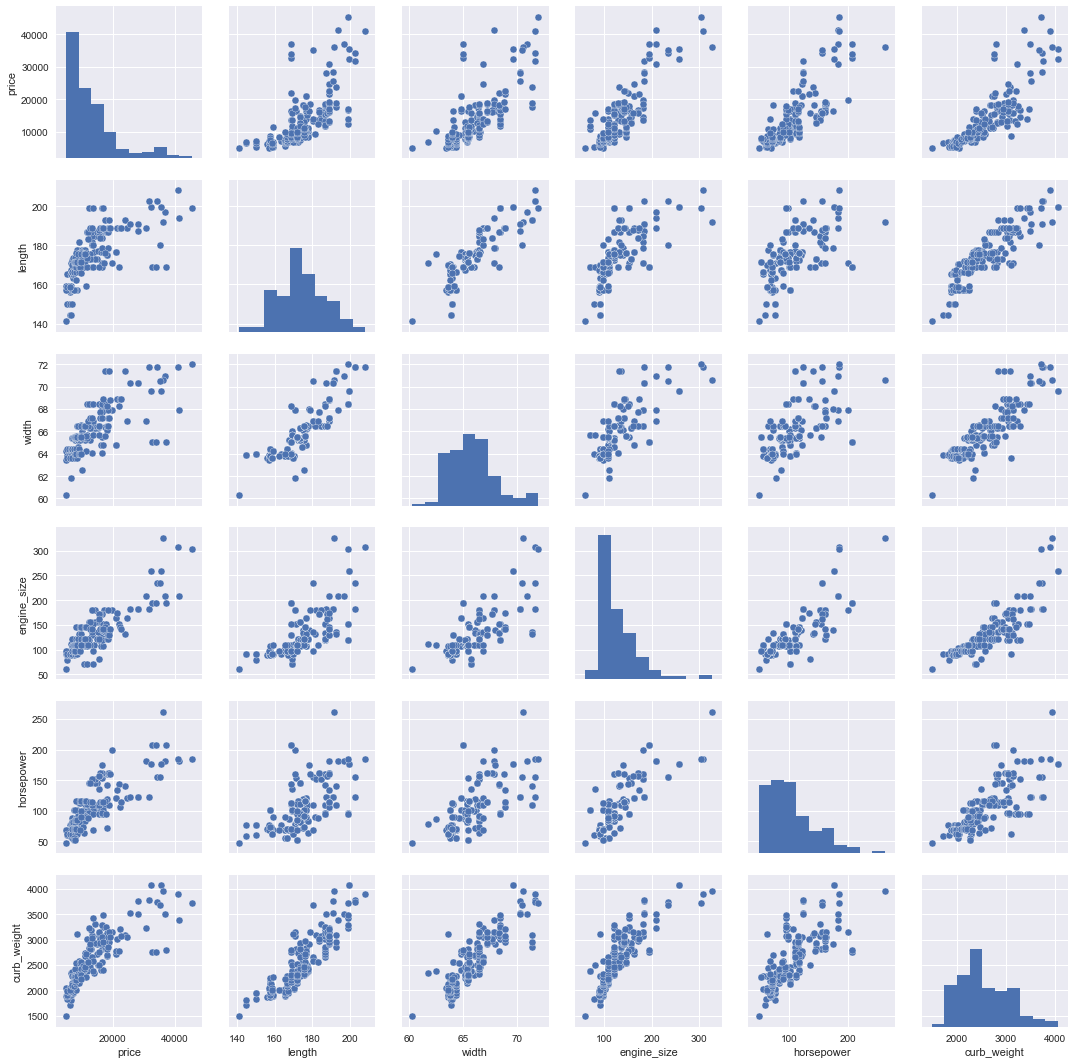

In [115]:
sns.set()
cols = ['price', 'length', 'width', 'engine_size', 'horsepower', 'curb_weight']
sns.pairplot(df_automobile[cols], size = 2.5)
plt.show();

## Identificação de Outliers Visualmente

In [116]:
sns.set(style="whitegrid", color_codes=True)

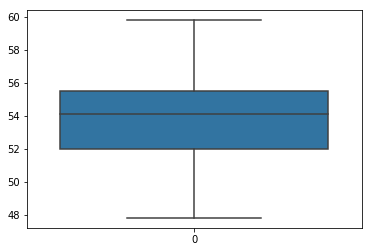

In [31]:
var = ['wheel_base', #0
       'length', #1
       'width', #2
       'height', #3
       'curb_weight', #4
       'engine_size', #5
       'stroke', #6
       'compression_ratio', #7
       'horsepower', #8
       'peak_rpm', #9
       'city_mpg', #10
       'highway_mpg'] #11
var = var[3]
sns.boxplot(data=df_automobile[var])

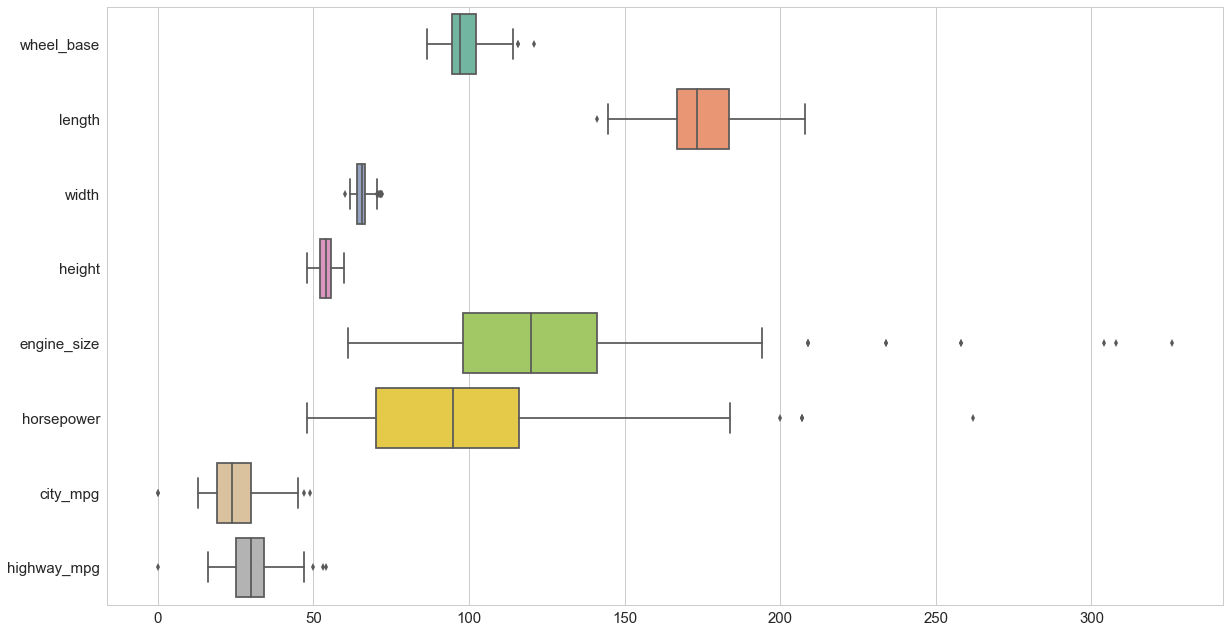

In [93]:
sns.set(rc={'figure.figsize':(20,11)}, font_scale=1.5, style='whitegrid')
cols = ['wheel_base', 'length', 'width', 'height', 'engine_size',
        'horsepower','city_mpg','highway_mpg']
ax = sns.boxplot(data=df_automobile[cols], orient="h", palette="Set2")

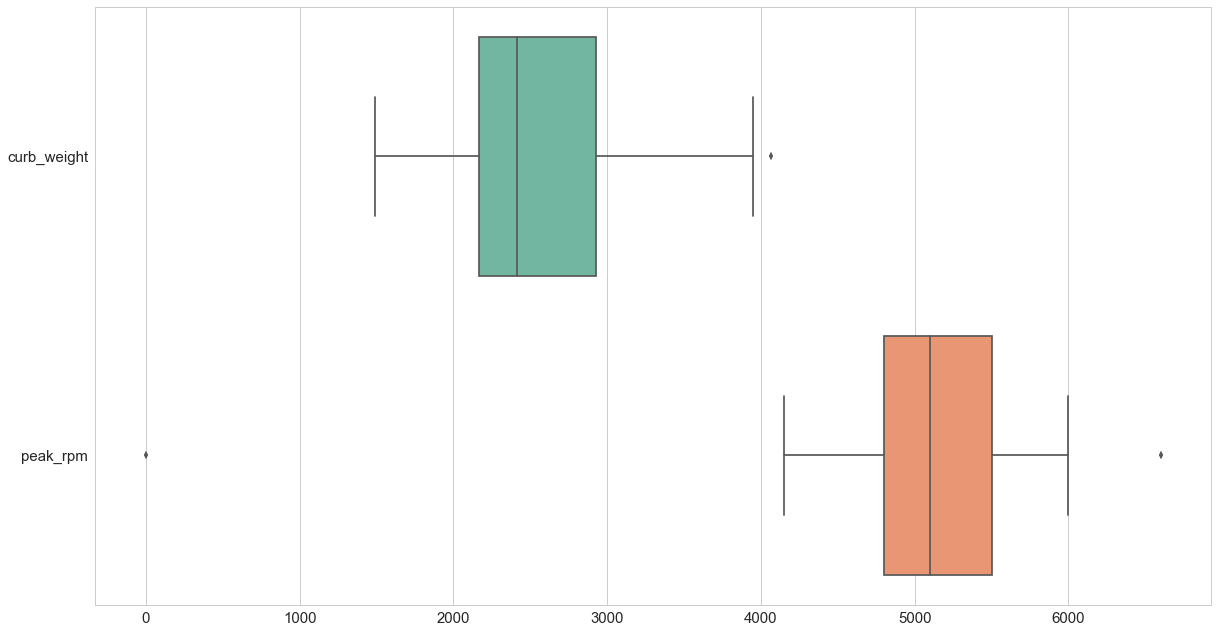

In [94]:
sns.set(rc={'figure.figsize':(20,11)}, font_scale=1.5, style='whitegrid')
cols = ['curb_weight', 'peak_rpm']
ax = sns.boxplot(data=df_automobile[cols], orient="h", palette="Set2")

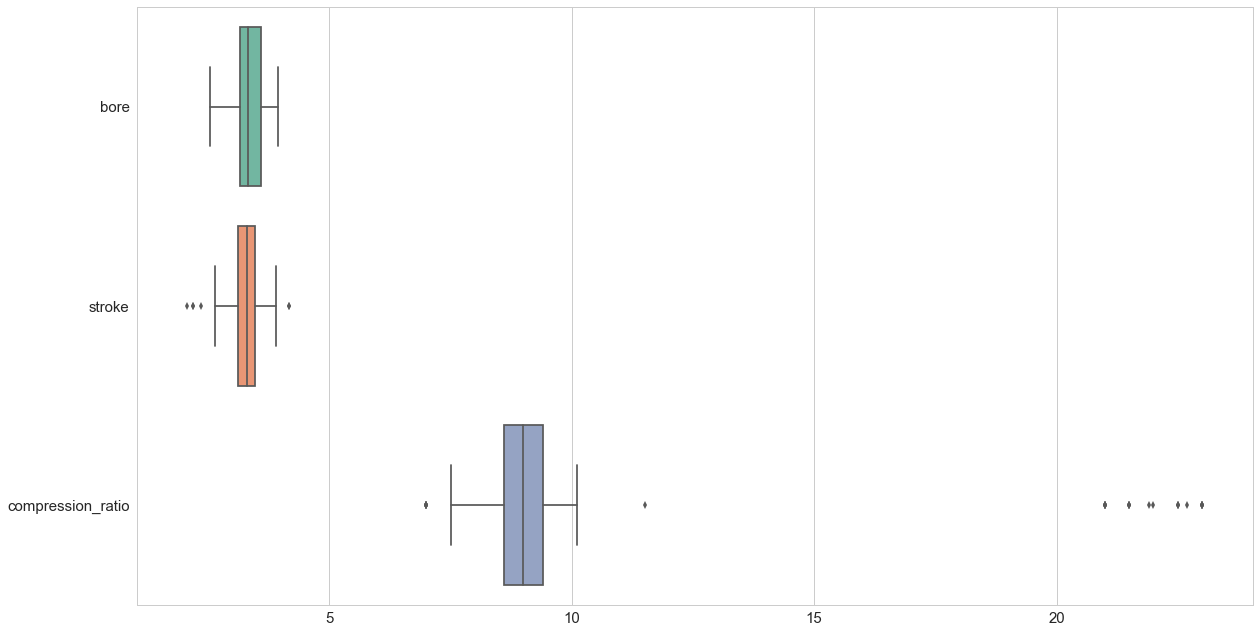

In [95]:
sns.set(rc={'figure.figsize':(20,11)}, font_scale=1.5, style='whitegrid')
cols = ['bore', 'stroke', 'compression_ratio']
ax = sns.boxplot(data=df_automobile[cols], orient="h", palette="Set2")

Análise de valores inválidos(valores considerados nulos)

In [118]:
df_automobile.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

Localizando respectivas linhas e colunas nulas

In [119]:
df_automobile.loc[df_automobile.isnull().any(axis=1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


Como na linha 32 existe valor nulo em "highway_mpg" e temos uma alta correlação entre "city_mpg" e "highway_mpg". Fazemos a consulta abaixo de acordo com o valor do campo "city_mpg" da mesma

In [120]:
df_automobile.loc[df_automobile["city_mpg"]==30.0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129
34,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7295
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295
47,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,...,91,2bbl,3.03,3.15,9.0,68,5000.0,30.0,31.0,5195
152,toyota,gas,std,four,sedan,fwd,front,95.7,166.3,64.4,...,98,2bbl,3.19,3.03,9.0,70,4800.0,30.0,37.0,6938
153,toyota,gas,std,four,hatchback,fwd,front,95.7,166.3,64.4,...,98,2bbl,3.19,3.03,9.0,70,4800.0,30.0,37.0,7198
170,toyota,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,...,110,idi,3.27,3.35,22.5,73,4500.0,30.0,33.0,10698


Neste caso então, atribuímos o valor da coluna "highway_mpg" de acordo com a média do resultado da pesquisa que contém o mesmo valor do campo "city_mpg". Obs.:i+1 porque o 1º valor é nan.
Referência/Exemplo do "for" com "if": https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas. Também utilizamos a função match.ceil para arredondamento pois todos os valores são inteiros.

In [121]:
import webbrowser
site = "https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas"
#Exemplo para abertura de site... descomentar abaixo
#webbrowser.open(site)

In [122]:
highway = 0
for i in range(0, len(df_automobile)):
    if df_automobile.iloc[i]['city_mpg'] == 30.0:
        highway = df_automobile.iloc[i+1]['highway_mpg'] + highway
highway = highway/7
highway = math.ceil(highway)
highway

40

In [123]:
df_automobile.loc[32,"highway_mpg"]

nan

In [124]:
df_automobile.loc[32,"highway_mpg"] = highway
df_automobile.loc[32,"highway_mpg"]

40.0

O mesmo processo será realizado para para linha 36 porém invertendo as colunas.

In [125]:
df_automobile.loc[df_automobile["highway_mpg"]==33.0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
37,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,27.0,33.0,9095
38,honda,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,27.0,33.0,8845
39,honda,gas,std,four,sedan,fwd,front,96.5,175.4,62.5,...,110,1bbl,3.15,3.58,9.0,86,5800.0,27.0,33.0,10295
105,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,13200
109,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,16900
113,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,17950
138,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,...,108,2bbl,3.62,2.64,9.5,82,4400.0,28.0,33.0,7775
170,toyota,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,...,110,idi,3.27,3.35,22.5,73,4500.0,30.0,33.0,10698


Resolvendo em uma única linha a média de todos os registros onde o *highway_mpg* é igual a 33 para substituirmos o na na *city_mpg*. Diferente da resloção acima utilizando o "for".

In [126]:
city = math.ceil(df_automobile.loc[df_automobile["highway_mpg"]==33.0]["city_mpg"].mean())
city

28

In [127]:
df_automobile.loc[36,"city_mpg"]

nan

In [128]:
df_automobile.loc[36,"city_mpg"] = city
df_automobile.loc[36,"city_mpg"]

28.0

Como pode ver então, temos as colunas "city_mpg" e "highway_mpg" resolvidas.

In [129]:
df_automobile.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg               False
highway_mpg            False
price                  False
dtype: bool

De acordo com esta referência: https://www.htforum.com/forum/threads/calculadora-de-potencia-entenda-a-relacao-entre-potencia-torque-e-rpm.221156/, temos o cálculo para descobrir Potencia=kw (que ainda nao temos), RPM (nosso peak_rpm) e Torque = nm (que ainda nao temos). A partir disso incluímos as colunas KW e Torque para auxiliar na conclusão da coluna faltante (peak_rpm).

In [130]:
df_automobile['kw'] = df_automobile['horsepower'] * 1.3596216
df_automobile['kw'].head(1)

0    150.917998
Name: kw, dtype: float64

In [131]:
df_automobile['nm'] = (df_automobile['kw']*60000)/(math.pi*2*df_automobile['peak_rpm'])
df_automobile['nm'].head(1)

0    288.232144
Name: nm, dtype: float64

In [132]:
df_automobile.loc[32,"nm"] = 0
df_automobile.loc[35,"nm"] = 0
df_automobile.loc[136,"nm"] = 0
df_automobile.loc[184,"nm"] = 0

Agora que temos as 2 novas colunas, podemos ver que possuímos valor nan na coluna "nm" devido o calculo anterior utilizar a coluna "peak_mpg".

In [133]:
df_automobile.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg               False
highway_mpg            False
price                  False
kw                     False
nm                     False
dtype: bool

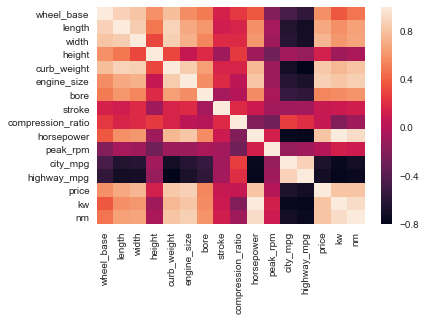

In [134]:
sns.heatmap(df_automobile.corr())

Como temos alta correlação em "kw" e "nm" preencheremos a coluna "nm"

In [135]:
df_automobile.loc[df_automobile.isnull().any(axis=1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,3.62,2.64,8.7,73,NaN,26.0,31.0,7603,99.252377,0.0
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.40,10.0,100,NaN,26.0,32.0,9995,135.962160,0.0


Com foco na resolução da linha 136, abaixo populo uma variável filtrando o valor da coluna kw da mesma.

In [136]:
kw = df_automobile[(df_automobile["kw"] >= 99) & (df_automobile["kw"] <= 100)]
kw

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
135,subaru,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,...,3.62,2.64,8.7,73,4400.0,26.0,31.0,7053,99.252377,215.406905
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,3.62,2.64,8.7,73,NaN,26.0,31.0,7603,99.252377,0.000000
170,toyota,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,...,3.27,3.35,22.5,73,4500.0,30.0,33.0,10698,99.252377,210.620085


Como podemos ver, a linha 135 tem as mesmas caracteristicas diferente da linha 170 que trata-se inclusive de outro veículo (make) com outros valores distintos e portanto utilizamos os valores peak e nm para preenchimento da 136.

In [137]:
df_automobile.loc[136,"peak_rpm"] = df_automobile.loc[135,"peak_rpm"]
df_automobile.loc[136,"nm"] = df_automobile.loc[135,"nm"]

In [138]:
df_automobile.loc[df_automobile.isnull().any(axis=1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.4,10.0,100,NaN,26.0,32.0,9995,135.96216,0.0


Resolução da ultima linha nula

In [139]:
kw = df_automobile[(df_automobile["kw"] >= 135) & (df_automobile["kw"] <= 136)]
kw

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
41,honda,gas,std,two,sedan,fwd,front,96.5,169.1,66.0,...,3.15,3.58,9.1,100,5500.0,25.0,31.0,10345,135.96216,236.062362
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.40,10.0,100,NaN,26.0,32.0,9995,135.96216,0.000000


Como não ficamos satisfeito com o retorno acima fizemos um novo filtro conforme abaixo:

In [140]:
kw = df_automobile[(df_automobile["make"] == "volkswagen") & (df_automobile["wheel_base"] > 97) & (df_automobile["wheel_base"] < 98) & (df_automobile["length"] > 171) & (df_automobile["length"] < 172) & (df_automobile["fuel_type"] == "gas")]
kw

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
179,volkswagen,gas,std,two,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.4,9.0,85,5250.0,27.0,34.0,7975,115.567836,210.207913
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.4,9.0,85,5250.0,0.0,34.0,8195,115.567836,210.207913
182,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.4,9.0,85,5250.0,27.0,34.0,8495,115.567836,210.207913
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,3.19,3.4,10.0,100,NaN,26.0,32.0,9995,135.962160,0.000000


Nesse caso ja resolvemos tambem o valor zerado do campo "city_mpg" da linha 181

In [141]:
df_automobile.loc[184,"peak_rpm"] = df_automobile.loc[182,"peak_rpm"]
df_automobile.loc[184,"nm"] = df_automobile.loc[182,"nm"]
df_automobile.loc[181,"city_mpg"] = df_automobile.loc[179,"city_mpg"]

In [142]:
df_automobile.loc[df_automobile.isnull().any(axis=1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm


## Análise de valores com valores iguais a 0

Filtro com as caracteristicas.

In [143]:
df_automobile.loc[df_automobile["city_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176,167.233457,367.117673


In [144]:
df_automobile.loc[(df_automobile["highway_mpg"] == 25) & (df_automobile["make"] == 'mercedes-benz') & (df_automobile["aspiration"] == 'turbo')]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,25552,167.233457,367.117673
65,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,28248,167.233457,367.117673
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176,167.233457,367.117673


In [145]:
#Resolução
df_automobile.loc[66,"city_mpg"] = 22

In [146]:
#Confirmação
df_automobile.loc[df_automobile["city_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm


In [147]:
df_automobile.loc[df_automobile["highway_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600,167.233457,367.117673


In [148]:
#Filtro com as caracteristicas
df_automobile.loc[(df_automobile["city_mpg"] == 22) & (df_automobile["make"] == 'mercedes-benz') & (df_automobile["aspiration"] == 'turbo')]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,25552,167.233457,367.117673
65,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,28248,167.233457,367.117673
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,3.58,3.64,21.5,123,4350.0,22.0,25.0,28176,167.233457,367.117673
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600,167.233457,367.117673


In [149]:
#Resolução
df_automobile.loc[67,"highway_mpg"] = 25

In [150]:
#Confirmação
df_automobile.loc[df_automobile["highway_mpg"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm


In [151]:
df_automobile.loc[df_automobile["peak_rpm"] == 0]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.41,9.2,76,0.0,30.0,40.0,6529,103.331242,0.0
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,2.92,3.41,9.2,76,0.0,30.0,34.0,7295,103.331242,0.0


In [152]:
df_automobile.loc[(df_automobile["kw"] >= 103) & (df_automobile["kw"] <= 104) & (df_automobile["horsepower"] == 76)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,2.91,3.41,9.2,76,6000.0,31.0,38.0,6855,103.331242,164.456779
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.41,9.2,76,0.0,30.0,40.0,6529,103.331242,0.000000
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129,103.331242,164.456779
34,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,2.91,3.41,9.2,76,6000.0,30.0,34.0,7295,103.331242,164.456779
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,2.92,3.41,9.2,76,0.0,30.0,34.0,7295,103.331242,0.000000


In [153]:
df_automobile.loc[32,"peak_rpm"] = df_automobile.loc[33,"peak_rpm"]
df_automobile.loc[32,"nm"] = df_automobile.loc[33,"nm"]
df_automobile.loc[35,"peak_rpm"] = df_automobile.loc[33,"peak_rpm"]
df_automobile.loc[35,"nm"] = df_automobile.loc[33,"nm"]

## Análise Numérica de Outliers

In [154]:
summary = df_automobile.describe()

In [155]:
summary = summary.transpose()

In [156]:
summary.head()

,count,mean,std,min,25%,50%,75%,max
wheel_base,201.0,98.797015,6.066366,86.6,94.5,97.0,102.4,120.9
length,201.0,174.200995,12.322175,141.1,166.8,173.2,183.5,208.1
width,201.0,65.889055,2.101471,60.3,64.1,65.5,66.6,72.0
height,201.0,53.766667,2.447822,47.8,52.0,54.1,55.5,59.8
curb_weight,201.0,2555.666667,517.296727,1488.0,2169.0,2414.0,2926.0,4066.0


In [161]:
from collections import Counter

def identifica_outliers(df_automobile, features):
    """
    Obtém as caracteristicas do dataframe e retorna uma lista dos índices
    correspondente às observações contendo mais de n outliers de acordo
    com o método de Tukey.
    """
    outlier_indices = []
    outlier_indice_lower = []
    outlier_indice_upper = []

    # iteração sobre as colunas
    for col in features:
        # 1º quartil (25%)
        Q1 = np.percentile(df_automobile[col], 25)
        # 3º quartil (75%)
        Q3 = np.percentile(df_automobile[col], 75)
        # Diantancia Interquartil (IQR)
        IQR = Q3 - Q1

        # outlier 5x conforme enunciado
        outlier_step = 5 * IQR       
        # Determina a lista dos indices dos outliers para as caracteristicas col
        outlier_list_col = df_automobile[(df_automobile[col] < Q1 - outlier_step) | (df_automobile[col] > Q3 + outlier_step)].index
        # adiciona indices outlier col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
        outlier_lower = df_automobile[(df_automobile[col] < Q1 - outlier_step)].index
        outlier_indice_lower.extend(outlier_lower)
        
        outlier_upper = df_automobile[(df_automobile[col] > Q3 + outlier_step)].index
        outlier_indice_upper.extend(outlier_upper)


    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices) 
    outlier_indice_lower = Counter(outlier_indice_lower) 
    outlier_indice_upper = Counter(outlier_indice_upper) 
    #print(*outlier_indice_lower, sep=",")
    #print(*outlier_indice_upper, sep=",")
    print(*outlier_indices, sep=",")
    #multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    #print(*multiple_outliers, sep=",")
    #return multiple_outliers


In [162]:
columns = ['wheel_base', 'length', 'width','height', 'curb_weight']
# Parametros: dataframe + colunas
outliers = identifica_outliers(df_automobile, columns)


Referencia: https://gist.github.com/joseph-allen/14d72af86689c99e1e225e5771ce1600

## Mapeamento de Dados Paramétricos

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [163]:
def mapear_serie(serie):
    dict_gen = {}
    
    dict_gen ={k: v for v, k in enumerate(serie)}
        
    return dict_gen

In [168]:
fuel_type = pd.unique(df_automobile["fuel_type"])
fuel_type_map = mapear_serie(fuel_type)
fuel_type_map

{'gas': 0, 'diesel': 1}

In [169]:
df_automobile["fuel_type"] = df_automobile["fuel_type"].map(fuel_type_map)

In [170]:
aspiration = pd.unique(df_automobile["aspiration"])
aspiration_map = mapear_serie(aspiration)
aspiration_map

{'std': 0, 'turbo': 1}

In [171]:
df_automobile["aspiration"] = df_automobile["aspiration"].map(aspiration_map)

In [172]:
number_of_doors = pd.unique(df_automobile["number_of_doors"])
number_of_doors_map = mapear_serie(number_of_doors)
number_of_doors_map

{'two': 0, 'four': 1}

In [173]:
df_automobile["number_of_doors"] = df_automobile["number_of_doors"].map(number_of_doors_map)

In [176]:
engine_location = pd.unique(df_automobile["engine_location"])
engine_location_map = mapear_serie(engine_location)
engine_location_map

{'front': 0, 'rear': 1}

In [177]:
df_automobile["engine_location"] = df_automobile["engine_location"].map(engine_location_map)

In [181]:
number_of_cylinders_map = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
number_of_cylinders_map

{'four': 4,
 'six': 6,
 'five': 5,
 'three': 3,
 'twelve': 12,
 'two': 2,
 'eight': 8}

In [182]:
df_automobile["number_of_cylinders"] = df_automobile["number_of_cylinders"].map(number_of_cylinders_map)

In [ ]:
df_automobile.to_csv('data/automobileTratado.csv', sep=";")

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

%matplotlib inline
df_automobile = pd.read_csv("data/automobileTratado.csv", sep=";")
df_automobile.head(1)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
0,0,0,0,0,0,0,0,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495,150.917998,288.232144


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:
1.Regressão Linear
2.Regressão de Árvore de Decisão
3.Regressão Ridge

Pergunta: Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.


### Regressão Linear

In [186]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [187]:
feature_col_names = ['horsepower', 'engine_size','curb_weight', 'highway_mpg', 'peak_rpm']
predicted_class_names = ['price']

X = df_automobile[feature_col_names].values
y = df_automobile[predicted_class_names].values
split_test_size = 0.30
X = preprocessing.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [188]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df_automobile.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df_automobile.index)) * 100))

69.65% in training set
30.35% in test set


In [189]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [190]:
#30%
y_pred = lr_model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))

R2 score: 0.73


In [191]:
#Base Toda
y_pred_basetoda = lr_model.predict(X)

print('R2 score: %.2f' % r2_score(y, y_pred_basetoda))

R2 score: 0.77


R2 score está na faixa esperada de >= 70%

Utilizando predição

In [192]:
X[1]

array([0.01977035, 0.02315446, 0.45382748, 0.004809  , 0.89055628])

In [193]:
#'horsepower', 'engine_size','curb_weight', 'highway_mpg', 'peak_rpm'
predict_value = [[262, 326, 3950, 17, 5000]]
predict_value = preprocessing.normalize(predict_value)
lr_model.predict(predict_value)

array([38295.35553481])

In [194]:
lr_model.singular_

array([1.12865875, 0.06980779, 0.06028747, 0.02913055, 0.00987097])

In [195]:
#Pegando um exemplo
df_automobile.loc[(df_automobile["horsepower"] >= 250) & (df_automobile["engine_size"] >= 300)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,kw,nm
46,7,0,0,0,2,0,0,102.0,191.7,70.6,...,3.54,2.76,11.5,262,5000.0,13.0,17.0,36000,356.220859,680.331727


In [196]:
df_automobile.loc[46]

make                       7.000000
fuel_type                  0.000000
aspiration                 0.000000
number_of_doors            0.000000
body_style                 2.000000
drive_wheels               0.000000
engine_location            0.000000
wheel_base               102.000000
length                   191.700000
width                     70.600000
height                    47.800000
curb_weight             3950.000000
engine_type                1.000000
number_of_cylinders       12.000000
engine_size              326.000000
fuel_system                0.000000
bore                       3.540000
stroke                     2.760000
compression_ratio         11.500000
horsepower               262.000000
peak_rpm                5000.000000
city_mpg                  13.000000
highway_mpg               17.000000
price                  36000.000000
kw                       356.220859
nm                       680.331727
Name: 46, dtype: float64

Como podemos ver o exemplo, o elemento 46 possui as caracteristicas um pouco abaixo com um price de 36k

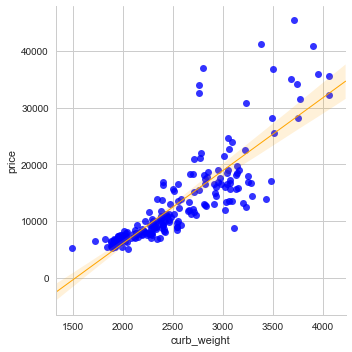

In [197]:
var = ['horsepower', 'engine_size','curb_weight', 'highway_mpg', 'peak_rpm'] 
var = var[2]
sns.lmplot(var, "price", df_automobile,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Regressão linear é o processo de traçar uma reta através dos dados em um diagrama de dispersão.Assim, o objetivo da regressão é obter um modelo matemático que melhor se ajuste aos valores observados de Y em função da variação dos níveis da variável X.
No nosso caso utilizamos 30% da base como teste. As features foram as 'horsepower', 'engine_size','curb_weight', 'highway_mpg', 'peak_rpm'(X) onde, são variáveis altamente correlacionas e inversamente correlacionadas com execeção da 'peak_mpg' que tem pouca correlação negativa de 0.4 para termos uma maior variabilidade para ajudar na predição. Para predict utilizamos 'price' (y).
Obtivemos um R2 Score de 77% o que é esperado :)


### Regressão de árvore de Decisão

#### Árvores de Decisão são métodos de aprendizado supervisionado não paramétrico utilizados para classificação ou regressão. O objetivo é criar um modelo que prediga o valor de uma variável alvo aprendendo regras de decisão simples inferida à partir de características dos dados.
#### Quanto mais profunda a árvore, mais complexa é a decisão e mais apto o modelo.

In [198]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Modelos de regressão de árvore de decisão (RAD), com diferentes profundidades

In [199]:
dtr_model_1 = tree.DecisionTreeRegressor(max_depth=2)
dtr_model_2 = tree.DecisionTreeRegressor(max_depth=5)
dtr_model_3 = tree.DecisionTreeRegressor(max_depth=8)
dtr_model = tree.DecisionTreeRegressor()

Definindo *array* com todos os preços da base original já tratada.

In [200]:
predicted_class_names = ['price']

y = df_automobile[predicted_class_names].values

## Modelo Treinado com 1 Features

Definindo *array* com todos os dados da *feature engine_size*.

In [201]:
feature_col_names = ['engine_size']

X = df_automobile[feature_col_names].values

Separando bases de treino e de teste com fatores 70x30 de maneira randômica, mas com um seed para que toda vez seja a mesma randomização.

In [202]:
split_test_size = 0.30

automobile_X_train, automobile_X_test, automobile_Y_train, automobile_y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

Treinando os modelos.

In [203]:
dtr_model_1.fit(automobile_X_train, automobile_Y_train)
dtr_model_2.fit(automobile_X_train, automobile_Y_train)
dtr_model_3.fit(automobile_X_train, automobile_Y_train)
dtr_model.fit(automobile_X_train, automobile_Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Plotando o resultado da árvore de decisão baseada em uma só *feature*.

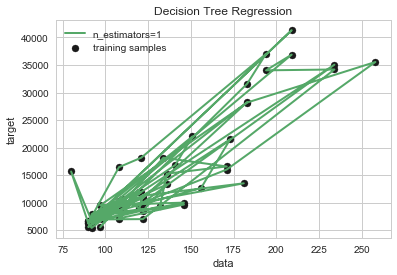

In [204]:
plt.figure()
plt.scatter(automobile_X_test, automobile_y_test, c="k", label="training samples")
plt.plot(automobile_X_test, automobile_y_test, c="g", label="n_estimators=1", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [205]:
print('Variance score: %.2f' % dtr_model_1.score(automobile_X_test, automobile_y_test))
print('Variance score: %.2f' % dtr_model_2.score(automobile_X_test, automobile_y_test))
print('Variance score: %.2f' % dtr_model_3.score(automobile_X_test, automobile_y_test))
print('Variance score: %.2f' % dtr_model.score(automobile_X_test, automobile_y_test))

Variance score: 0.85
Variance score: 0.89
Variance score: 0.89
Variance score: 0.89


Valore de R^2 extraidos do melhor modelo em cima de toda a base.

In [206]:
print('Variance score: %.2f' % dtr_model_2.score(X, y))

Variance score: 0.90


In [207]:
tamanhoMotor = 181
print('Predição para um veículo com %.2f de engine_size: %.2f' % (tamanhoMotor, dtr_model.predict(tamanhoMotor)))

Predição para um veículo com 181.00 de engine_size: 16639.00


### Modelo Treinado com 5 Features

Definindo *array* com todos os dados das *features* abaixo.

In [208]:
feature_col_names = ['horsepower','engine_size','curb_weight','highway_mpg','peak_rpm']

X = df_automobile[feature_col_names].values

In [209]:
split_test_size = 0.30

automobile_X_train, automobile_X_test, automobile_Y_train, automobile_y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [210]:
dtr_model_1.fit(automobile_X_train, automobile_Y_train)
dtr_model_2.fit(automobile_X_train, automobile_Y_train)
dtr_model_3.fit(automobile_X_train, automobile_Y_train)
dtr_model.fit(automobile_X_train, automobile_Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [211]:
print('Variance score: %.2f' % dtr_model_1.score(automobile_X_test, automobile_y_test))
print('Variance score: %.2f' % dtr_model_2.score(automobile_X_test, automobile_y_test))
print('Variance score: %.2f' % dtr_model_3.score(automobile_X_test, automobile_y_test))
print('Variance score: %.2f' % dtr_model.score(automobile_X_test, automobile_y_test))

Variance score: 0.88
Variance score: 0.91
Variance score: 0.91
Variance score: 0.91


In [212]:
y_5 = dtr_model_2.predict(X)

In [213]:
print('Variance score: %.2f' % r2_score(y, y_5))

Variance score: 0.92


In [214]:
cavaloForca = 69
tamanhoMotor = 97
peso = 2050
consumo = 36
picoRPM = 4900
dtr_model_3.predict([[cavaloForca, tamanhoMotor, peso, consumo, picoRPM]])
print('Predição para um veículo com horsepower: %.2f, engine_size: %.2f, curb_weight: %.2f, highway_mpg; %.2f, peak_rpm: %.2f é de %.2f' % (cavaloForca, tamanhoMotor, peso, consumo, picoRPM, dtr_model_2.predict([[cavaloForca, tamanhoMotor, peso, consumo, picoRPM]])))
#, engine_size: %.2f, curb_weight: %.2f, highway_mpg: %.2f, peak_rpm:  é de:' % (cavaloForca, tamanhoMotor, peso, consumo, picoRPM))

Predição para um veículo com horsepower: 69.00, engine_size: 97.00, curb_weight: 2050.00, highway_mpg; 36.00, peak_rpm: 4900.00 é de 7059.30


Analisando a importância de cada uma das variáveis no modelo de RAD.

In [215]:
dtr_model_3.feature_importances_

array([0.05192642, 0.57837028, 0.32092864, 0.04818549, 0.00058917])

O modelo levou em consideração com muito mais enfâse as *features*, *horsepower* e *engine_size*, por isso iremos refazer o modelo abaixo considerando apenas estas.

## Modelo com as 2 Features mais relevantes
Features com maior importância identificadas pelo modelo de regressão de árvore de decisão.

In [216]:
feature_col_names = ['engine_size','curb_weight']

X = df_automobile[feature_col_names].values

In [217]:
split_test_size = 0.30

automobile_X_train, automobile_X_test, automobile_Y_train, automobile_y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [218]:
dtr_model_1.fit(automobile_X_train, automobile_Y_train.ravel())
dtr_model_2.fit(automobile_X_train, automobile_Y_train.ravel())
dtr_model_3.fit(automobile_X_train, automobile_Y_train.ravel())
dtr_model.fit(automobile_X_train, automobile_Y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [219]:
y_1 = dtr_model_1.predict(automobile_X_test)
y_2 = dtr_model_2.predict(automobile_X_test)
y_3 = dtr_model_3.predict(automobile_X_test)
y_4 = dtr_model.predict(automobile_X_test)

In [220]:
print('Variance score: %.2f' % r2_score(automobile_y_test, y_1))
print('Variance score: %.2f' % r2_score(automobile_y_test, y_2))
print('Variance score: %.2f' % r2_score(automobile_y_test, y_3))
print('Variance score: %.2f' % r2_score(automobile_y_test, y_4))

Variance score: 0.86
Variance score: 0.90
Variance score: 0.89
Variance score: 0.88


In [221]:
y_5 = dtr_model_2.predict(X)

In [222]:
print('Variance score: %.2f' % r2_score(y, y_5))

Variance score: 0.92


In [223]:
dtr_model_3.predict([[97,2050]])

array([5118.])

#### De acordo com as nossas análises a regressão de árvore de decisão em questão está com overfiting, pois ao utilizá-lo para predizer um valor com base em características ela apresenta exatamente o valore da amostra de treino.

### Regressão Ridge

Regressão Ridge,é uma tecnica utilizada para analise de multiplas variaveis, multicorrelacionando elas com a varivel resposta, de maneira que possamos analisar as variaveis altamente e inversamente correlacionadas com a variavel target. 

In [344]:
predicted_class_names = ['price']

y = df_automobile[predicted_class_names].values

In [345]:
features_col_names = ["horsepower","engine_size","curb_weight","highway_mpg","peak_rpm"]

X = df_automobile[features_col_names].values
Y = df_automobile["price"]

X = preprocessing.normalize(X)
#y = preprocessing.normalize(y)

In [346]:
split_test_size = 0.30

automobile_X_train ,automobile_X_test, automobile_Y_train, automobile_y_test = train_test_split(X,y,test_size = split_test_size,random_state = 42)

In [347]:
regr = linear_model.Ridge()

In [352]:
regr.fit(automobile_X_train, automobile_Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [354]:
 automobile_y_pred= regr.predict(X)

Escore sobre a base

In [355]:
print('Variance score: %.2f' % r2_score(y, automobile_y_pred))

Variance score: 0.39


In [356]:
regr.predict(preprocessing.normalize([[69,97,2050,36,4900]]))

array([10691.33767545])

In [357]:
regr.coef_

array([  2872.06316801,   3165.7323424 ,  25843.33803141,   -628.94644965,
       -14902.19376171])

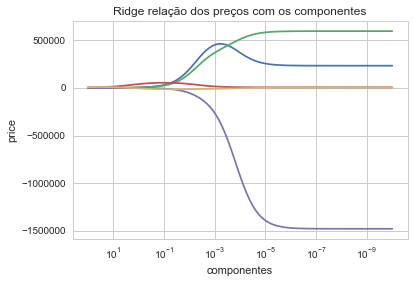

In [365]:
n_alphas = 101
alphas = np.logspace(-10, 2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('componentes')
plt.ylabel('price')
plt.title('Ridge relação dos preços com os componentes')
plt.axis('tight')
plt.show()

### De acordo com nossas analises o melhor modelo para predição de preço de um automovel com base nas *features* mais releventes identificadas dentres os modelos é a regressão linear que obteve o maior R^2 real de 0.77, por se tratar de uma base pequena a regressão de arvore de decisão ficou com *overfitting*  R^2 maior que 0.95 porcento, enquanto o modelo ridge utilizando *features* diretamente e inversamente correlacionadas com a *feature target* obteve R^2 de 0.39 porcento     